In [1]:
# %pylab inline

In [2]:
%config IPCompleter.greedy=True

import pandas
import numpy as np
import datetime
import xarray as xr
import pickle 
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
import sys
sys.path.append('/home/srvx11/lehre/users/a1400070/CEUAS/CEUAS/public/cds-backend/code')
import cds_eua3 as eua
eua.logging_set_level(30)

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [4]:
# ncfilename = '0-20100-0-00201.nc'
# data = xr.open_dataset('/raid60/scratch/leo/scratch/RI/Pangaea/nc/'+ncfilename, group='observations_table')
# # date_time is a variable - make it into an index
# data = data.swap_dims({'index':'date_time'})
# # data = data.swap_dims({'index':'report_id'})
# data.load()

# # 0-20100-0-00201-012
# # a = data.sel(date_time = np.datetime64('1950-05-10T14:43:00'))
# selection = data.date_time == np.datetime64('1950-05-10T14:43:00')
# selection = selection & (data.observed_variable  == 85)
# data.isel(date_time=selection)
# data.report_id[:]
# # data.sensor_id[:]
# # data.sel(report_id = str('0-20100-0-00201-012').encode())

## mit XArray

In [5]:
# comp = 'COMP003'

# file = r'/raid60/scratch/leo/scratch/RI/Pangaea/COMP/' +comp+ '/' +comp+ '_ListProfiles.xls'
# df = pandas.read_excel(file)

# file = r'/raid60/scratch/leo/scratch/RI/Pangaea/nc/mapping.tsv'
# tsv_read = pandas.read_csv(file, sep='\t')
# tsv_read['Comparison'][0] , tsv_read['File'][0]

# # get each timeseries from one ascent
# comps = []
# for i in df.drop_duplicates(subset=['id_ascent'])['id_ascent']:
#     comps.append(df[df['id_ascent'] == i])

# comps[0].iloc[0]['id_ascent']
# # iterate over all ascents (groups of timeseries)
# for j in comps:
#     print(len(j))
#     if(len(j) <= 1):
#         print('nothing to compare - one ascent or less')
#         continue
#     ncfiles = []
# #     iterate over each sensor teamseries in the ascent group
#     temp = []
#     pres = []
#     time = []
#     for i in range(len(j)):
# #         iterate through the tsv
#         for k in range(len(tsv_read)):
# #         find the right .nc file throug the sensor name
#             if(tsv_read['Comparison'][k] == j.iloc[i]['ri_name']):
#                 ncfilename = tsv_read['File'][k]
#                 ncfiles.append(ncfilename)
#                 break
# #         open data and extract only the wanted ascents       
#         data = xr.open_dataset('/raid60/scratch/leo/scratch/RI/Pangaea/nc/'+ncfilename, group='observations_table')
#         # report_id is a variable - make it into an index
#         data = data.swap_dims({'index':'report_id'})
#         ida = ncfilename[:15] + '-' + j.iloc[i]['id_ascent'][-3:]
#         print(ida)
# #           print((data.report_id.values[0]).decode(), ida)
# #           print(data.report_id.values[0], ida.encode())
#         try:
#             data = data.sel(report_id = ida.encode())
#         except:
#             print('missing Data for: ' + ida + ' in ' + ncfilename)
#         # date_time is a variable - make it into an index
# #         data = data.swap_dims({'report_id':'date_time'})
#         data.load()
#         gettemp = data.report_id == ida.encode()
#         gettemp = gettemp & (data.observed_variable  == 85)
# #         selection = data.date_time == np.datetime64('1950-05-10T14:43:00')
# #         selection = selection & (data.observed_variable  == 85)
# #         print(data.isel(report_id=gettemp).observation_value.values)
#         temp.append(data.isel(report_id=gettemp).observation_value.values)
#         time.append(data.isel(report_id=gettemp).date_time.values)
#         pres.append(data.isel(report_id=gettemp).z_coordinate.values)
        
# #     plt and save here
#     plt.figure(figsize=(16, 8))
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# #     fig.tight_layout()
# #     -
#     ax1.plot(time[0], temp[0], c='red')
#     ax1.plot(time[1], temp[1], c='blue')
#     try:
#         ax1.plot(time[2], temp[2], c='green')
#     except:
#         print('only ' , len(j))
#     try:
#         ax1.plot(time[3], temp[3], c='orange')
#     except:
#         print('only ' , len(j))
#     try:
#         ax1.plot(time[4], temp[4], c='black')
#     except:
#         print('only ' , len(j))
#     ax1.set(xlabel ='time', ylabel='TTT', title='TTT_nc/time')
#     ax1.grid()
# #     -
#     ax2.plot(time[0], np.log(pres[0]), c='red')
#     ax2.plot(time[1], np.log(pres[1]), c='blue')
#     try:
#         ax2.plot(time[2], np.log(pres[2]), c='green')
#     except:
#         print('only ' , len(j))
#     try:
#         ax2.plot(time[3], np.log(pres[3]), c='orange')
#     except:
#         print('only ' , len(j))
#     try:
#         ax2.plot(time[4], np.log(pres[4]), c='black')
#     except:
#         print('only ' , len(j))
#     ax2.set(xlabel ='time', ylabel='log(PPP)', title='PPP_nc/time')
#     ax2.invert_yaxis()
#     ax2.grid()
# #     -
#     ax3.plot(temp[0], np.log(pres[0]), c='red')
#     ax3.plot(temp[1], np.log(pres[1]), c='blue')
#     try:
#         ax3.plot(temp[2], np.log(pres[2]), c='green')
#     except:
#         print('only ' , len(j))
#     try:
#         ax3.plot(temp[3], np.log(pres[3]), c='orange')
#     except:
#         print('only ' , len(j))
#     try:
#         ax3.plot(temp[4], np.log(pres[4]), c='black')
#     except:
#         print('only ' , len(j))
#     ax3.set(xlabel ='TTT', ylabel='log(PPP)', title='TTT/PPP')
#     ax3.invert_yaxis()
#     ax3.grid()
# #     -
#     picname = 'nc_internal_comparison_'+np.array(j.id_ascent)[0]
#     fig.suptitle(picname, fontsize=16)
#     plt.show()
# #     fig.savefig(picname +'.png')
#     plt.close(fig)
#     print('----')
# #     if(ida == '0-20100-0-00202-054'):
# #         break

## mit EUA

4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


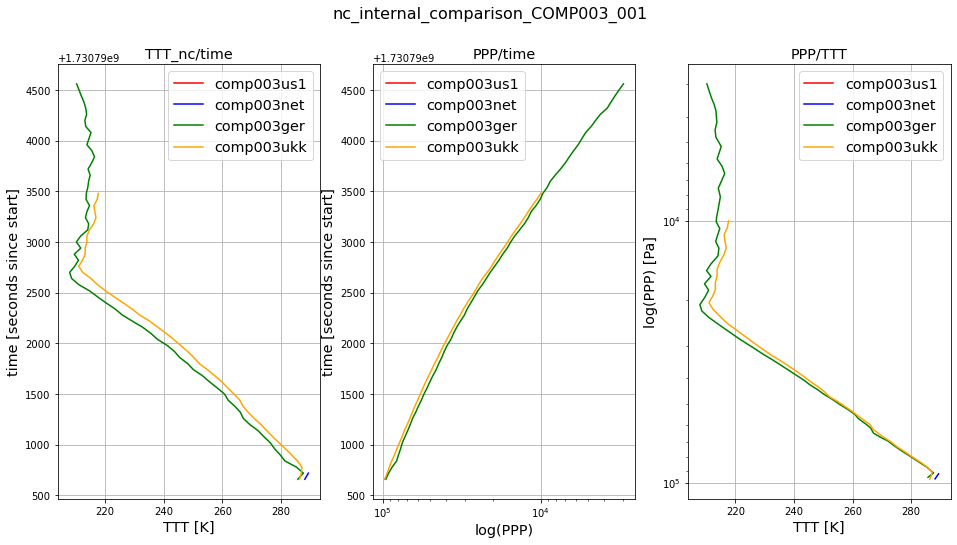

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


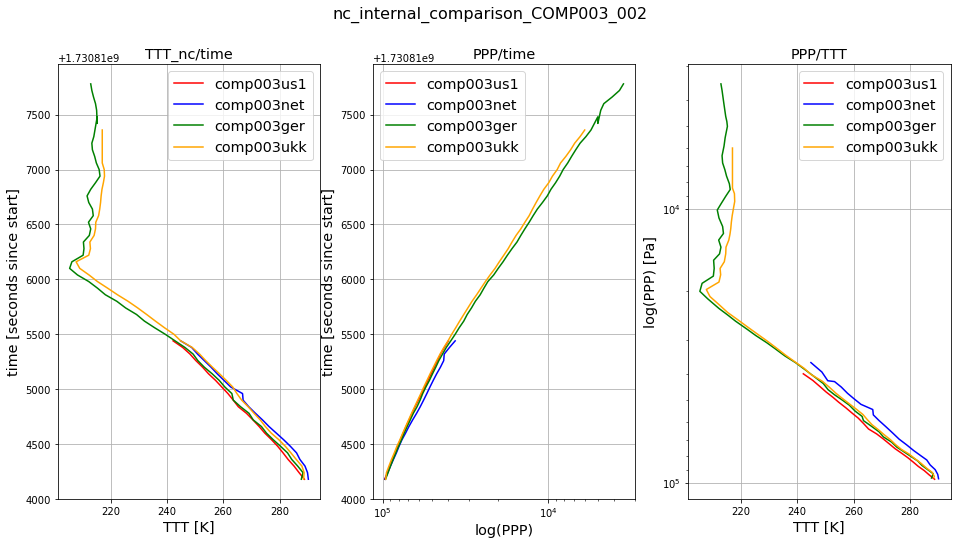

----
3
0-20100-0-00301.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  3
only  3
only  3
only  3
only  3
only  3


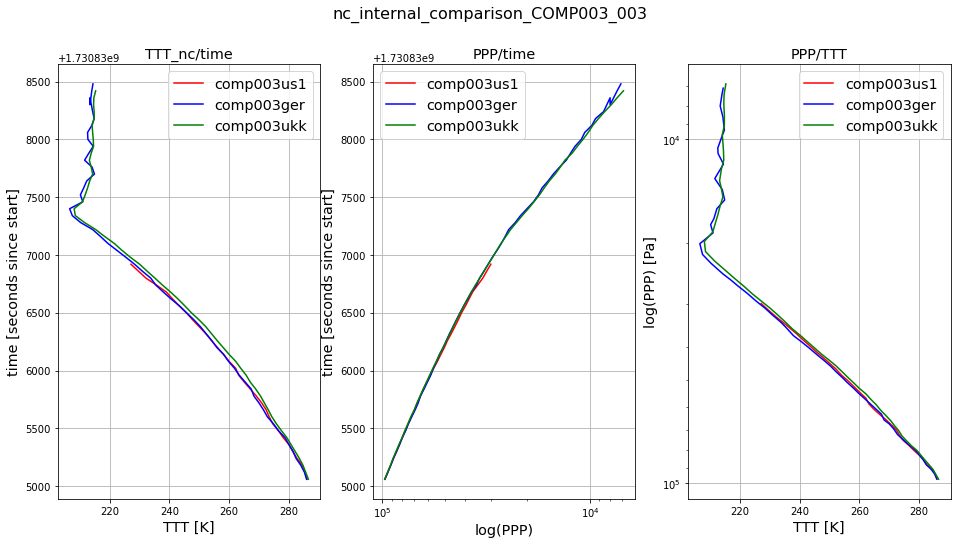

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


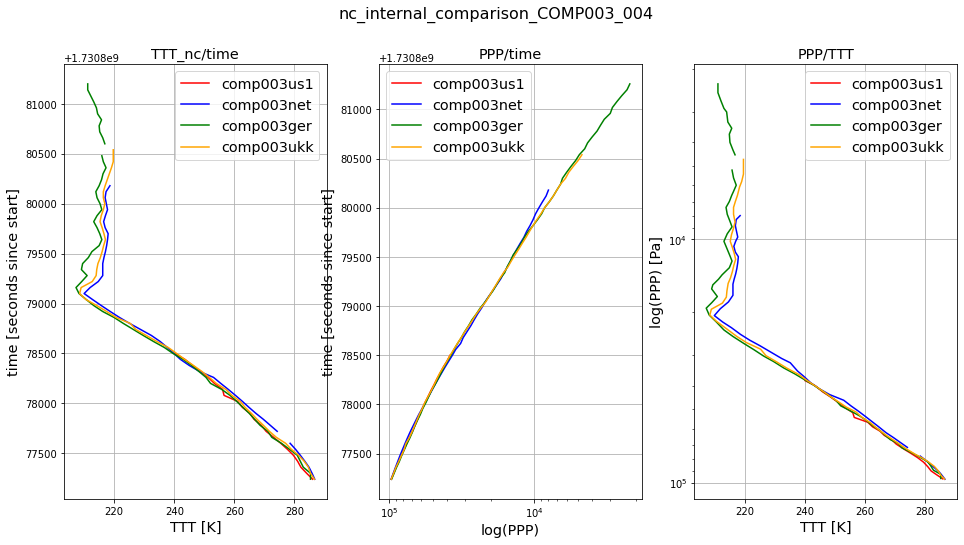

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


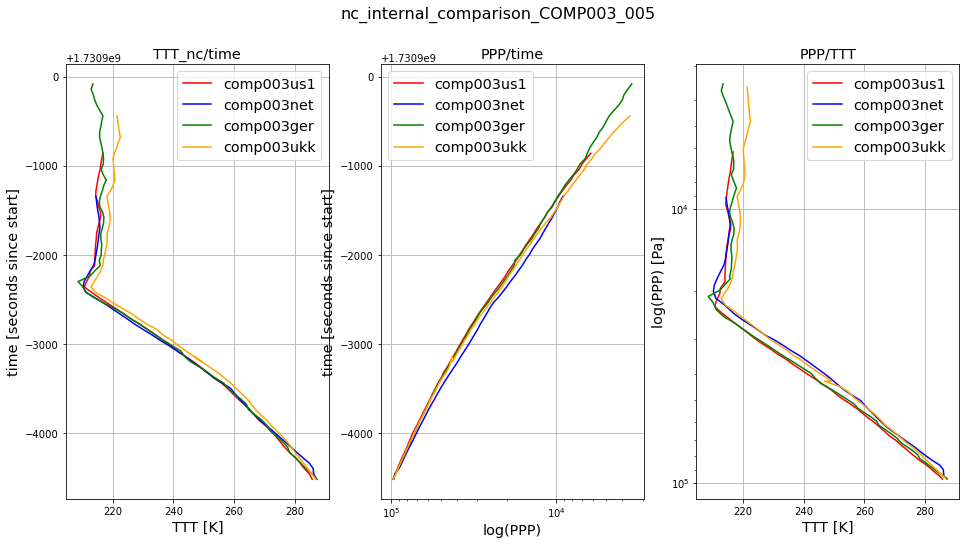

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


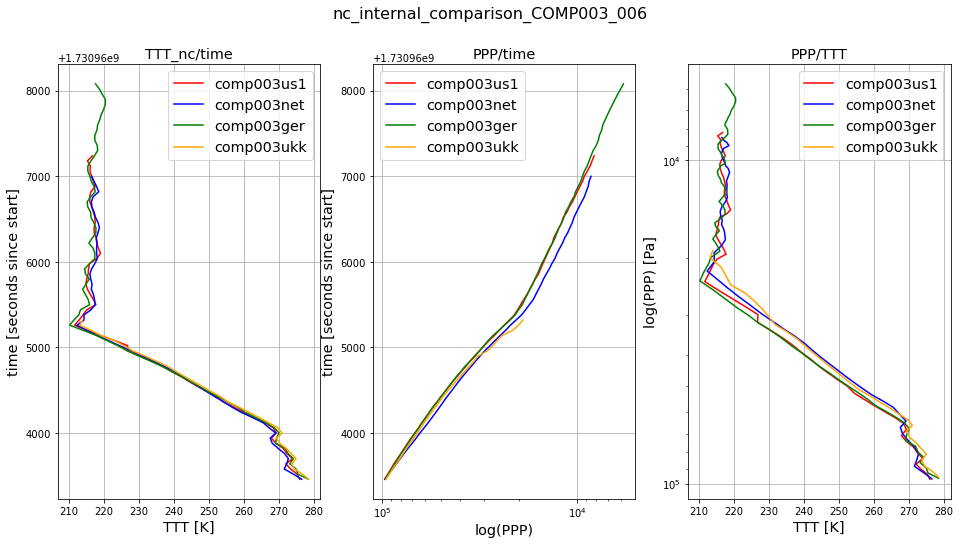

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


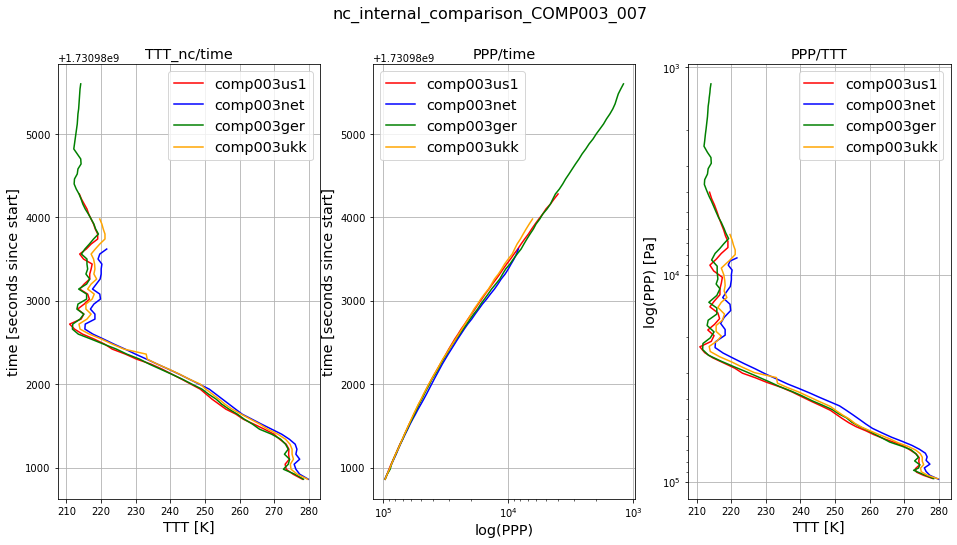

----
5
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc


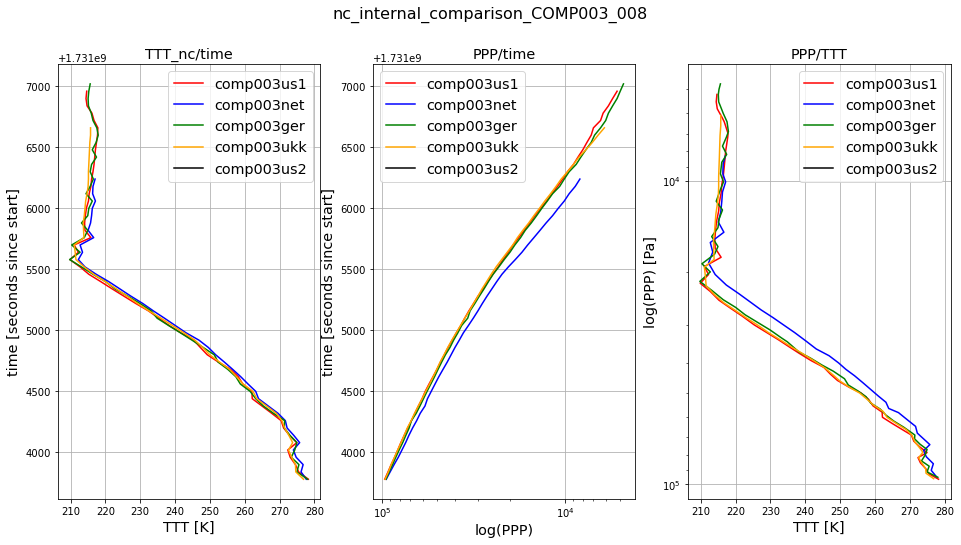

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


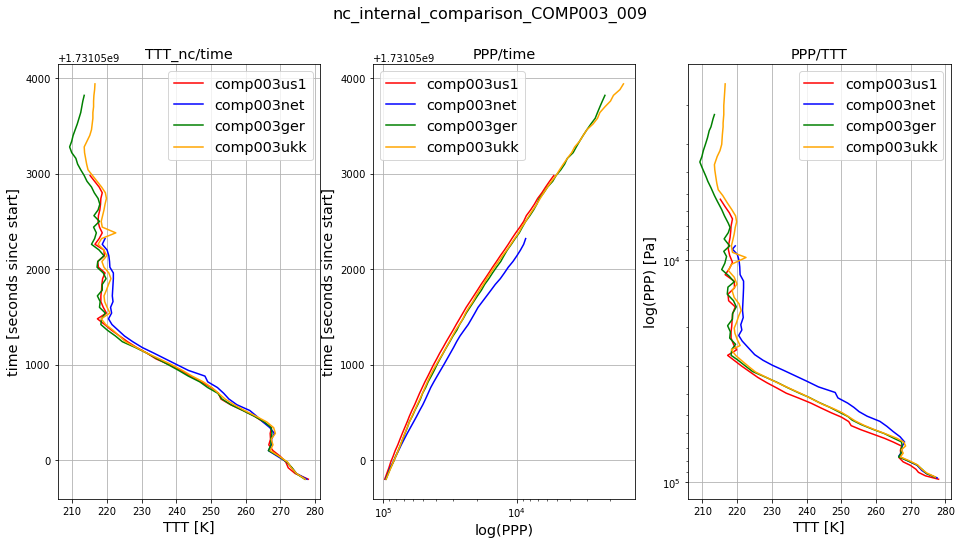

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


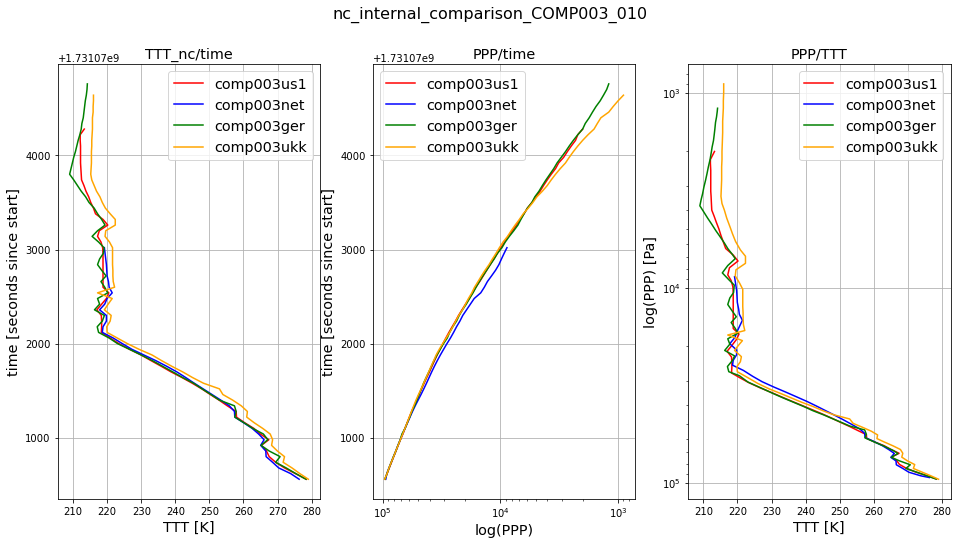

----
5
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc


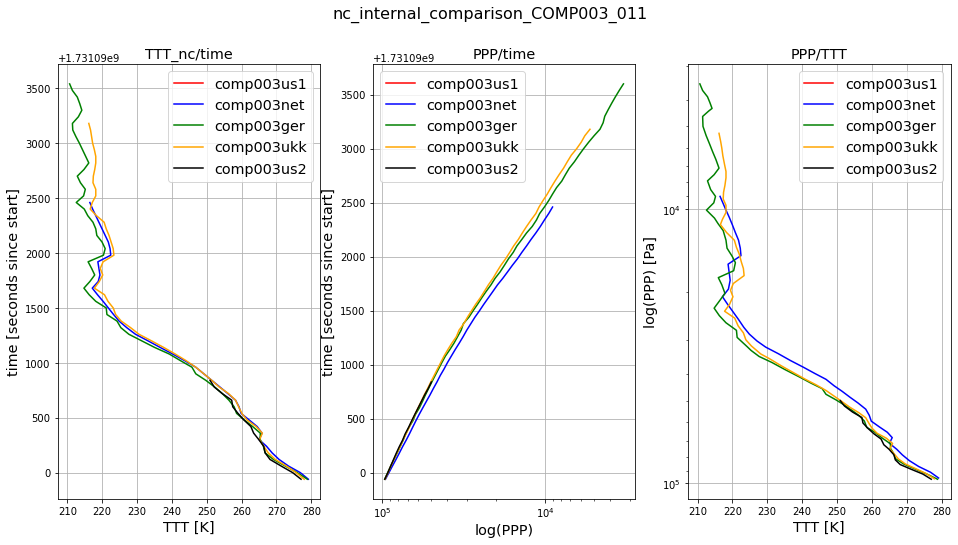

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


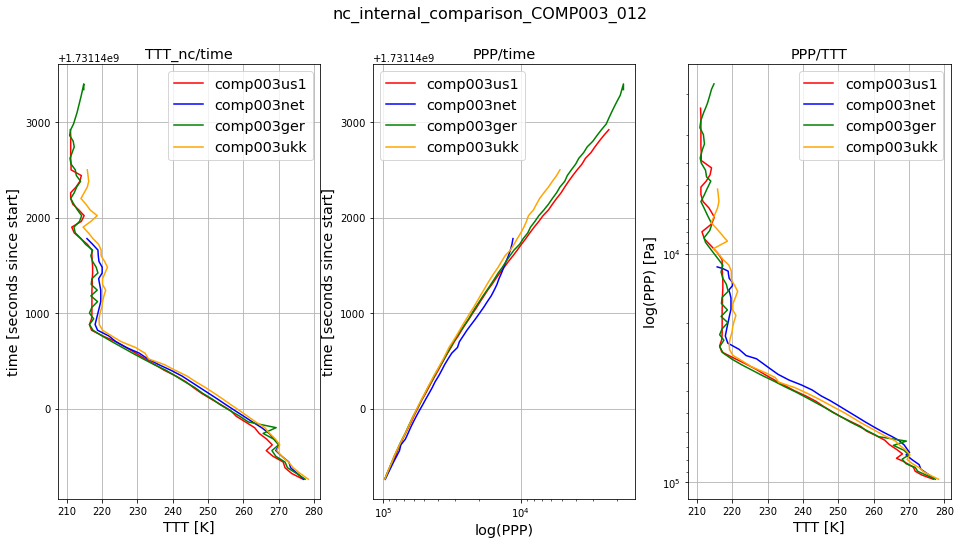

----
3
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  3
only  3
only  3
only  3
only  3
only  3


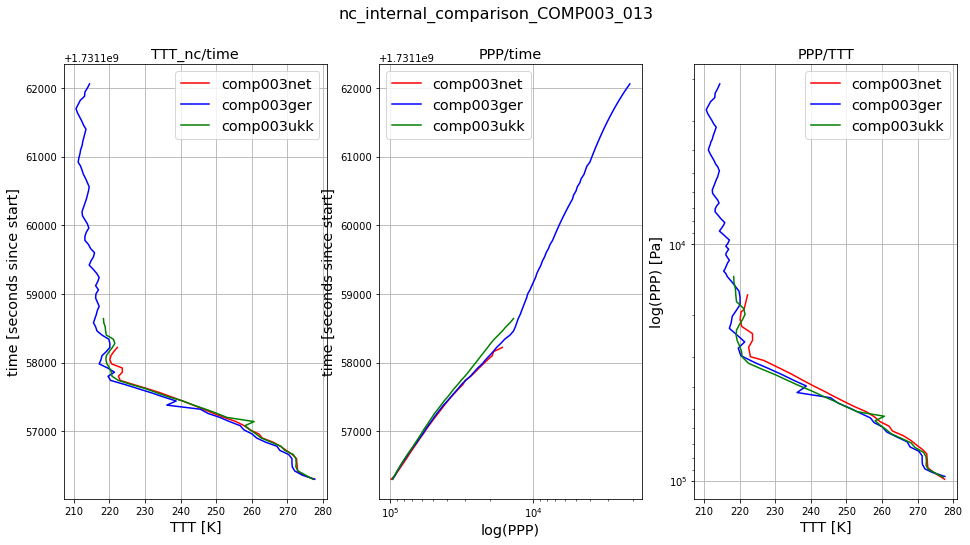

----
4
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc
only  4
only  4
only  4


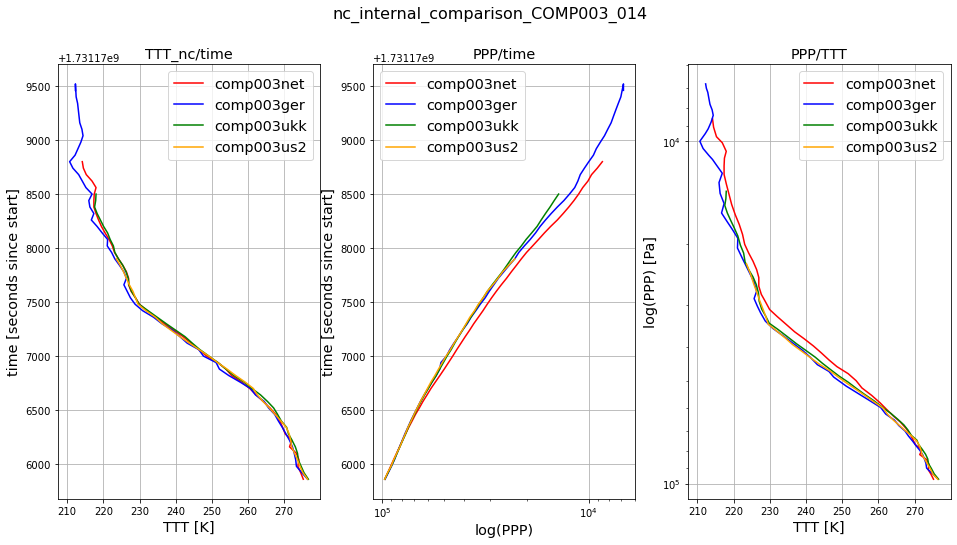

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


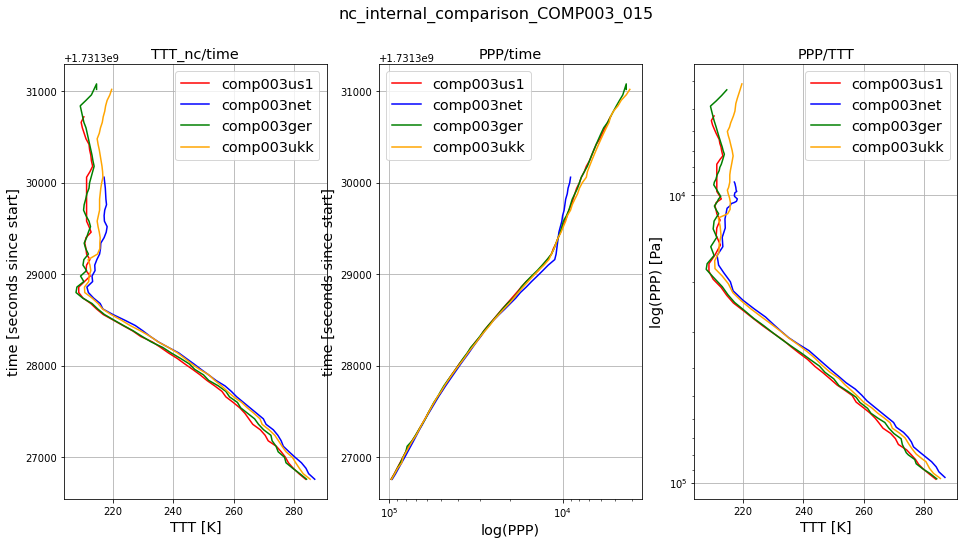

----
5
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc


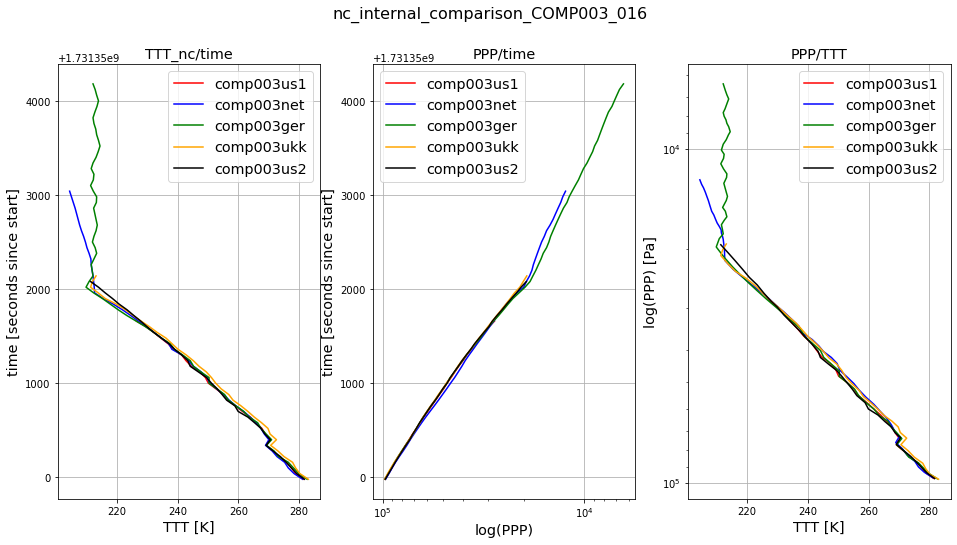

----
5
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc


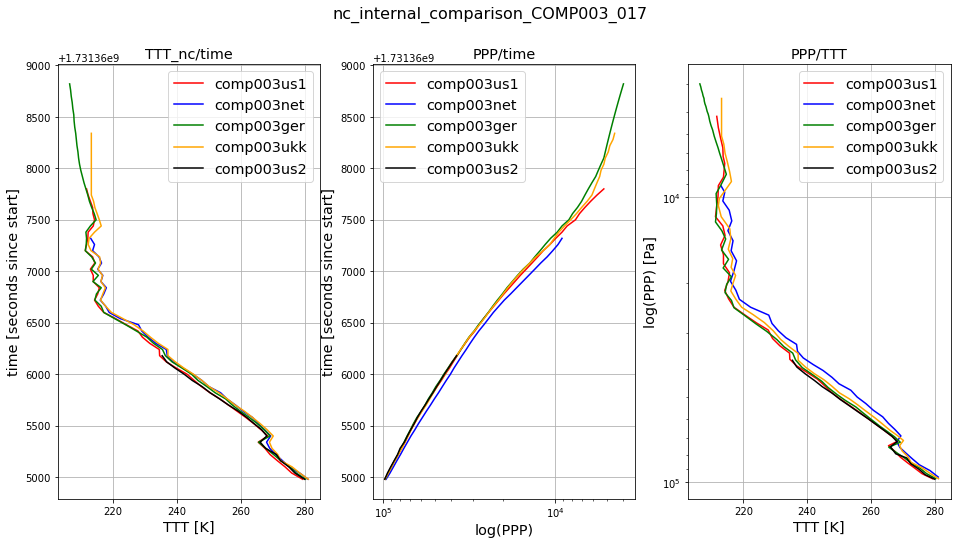

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


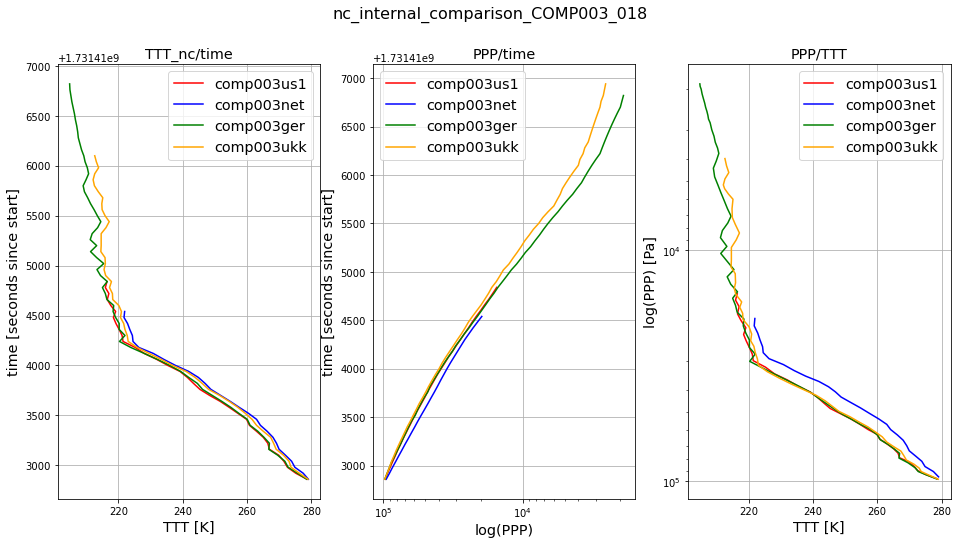

----
3
0-20100-0-00301.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  3
only  3
only  3
only  3
only  3
only  3


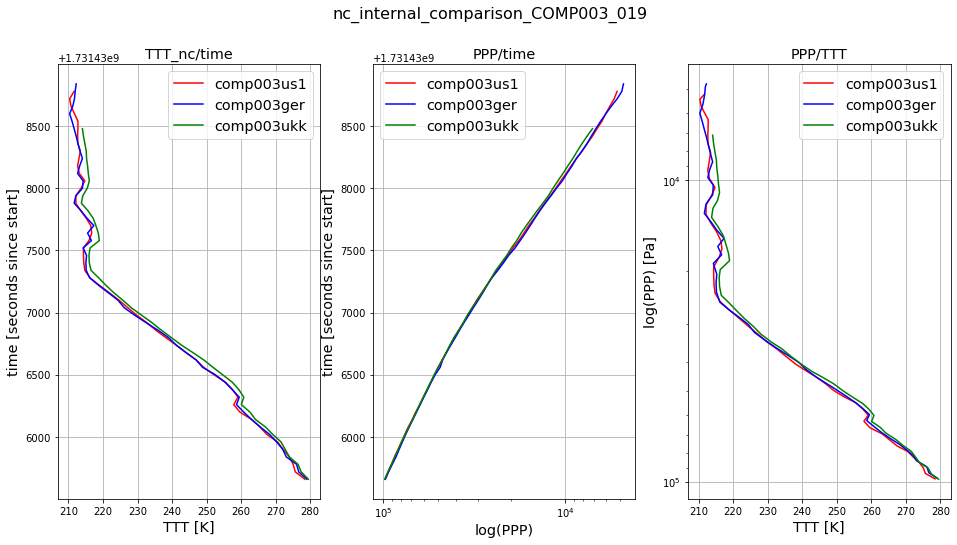

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


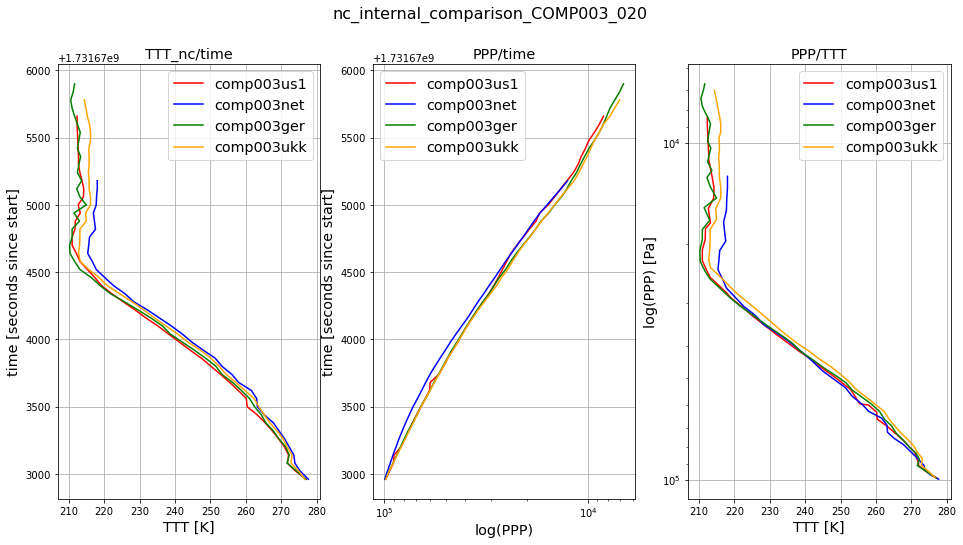

----
5
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc


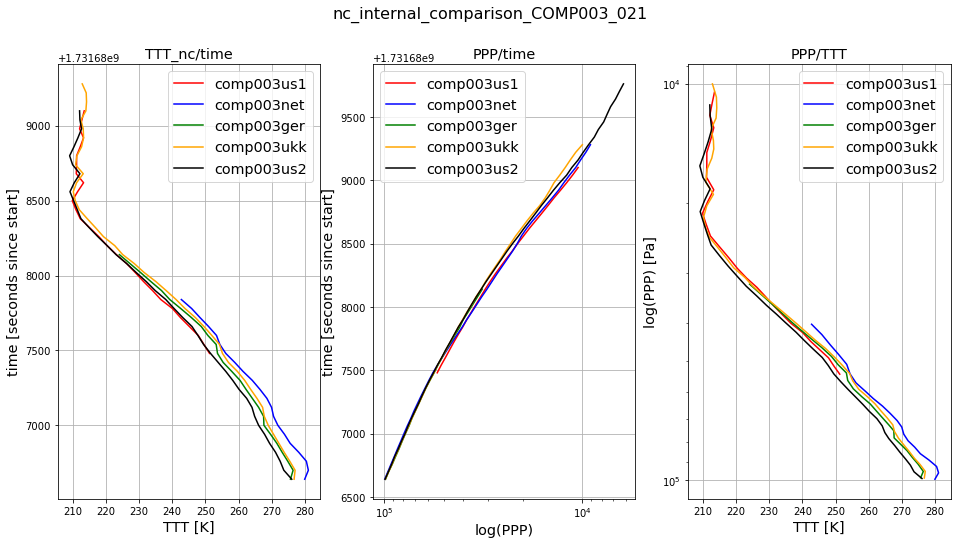

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


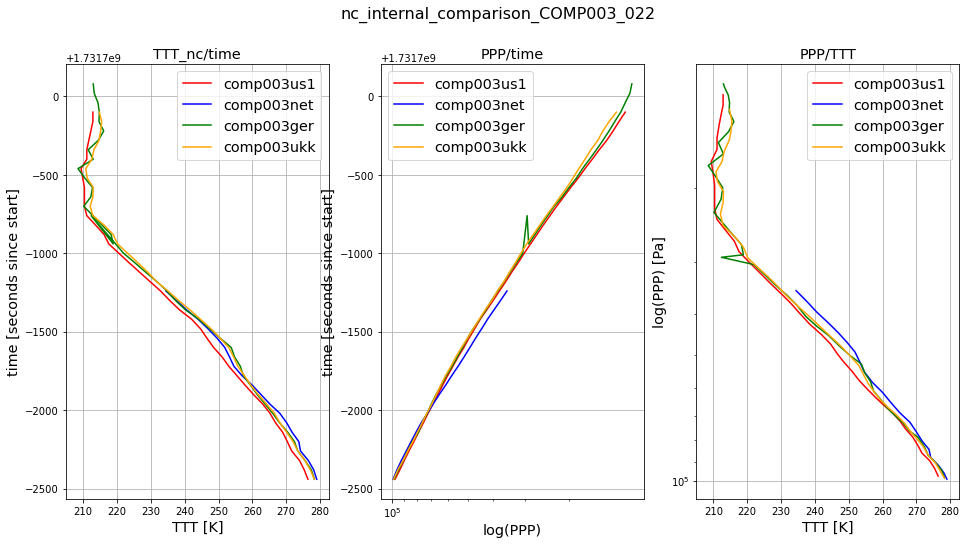

----
4
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc
only  4
only  4
only  4


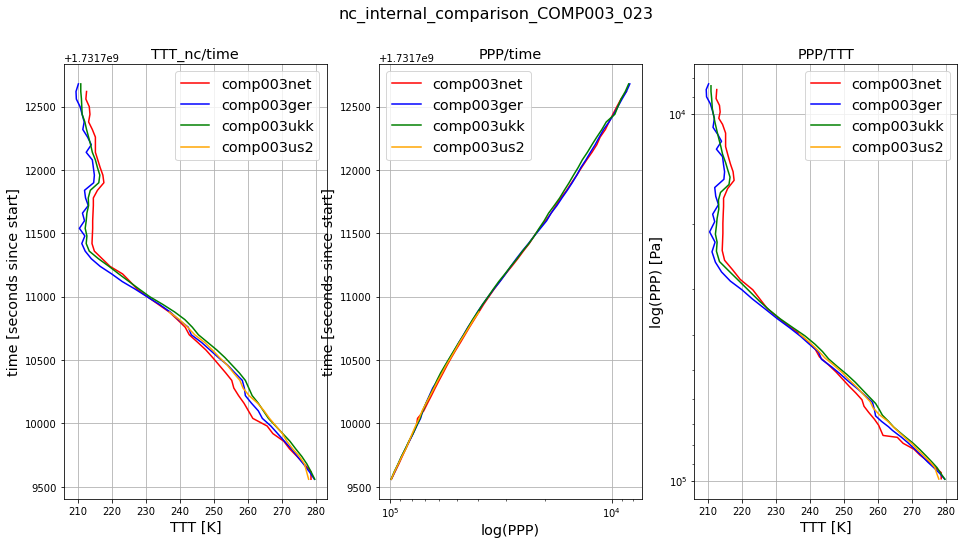

----
4
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
only  4
only  4
only  4


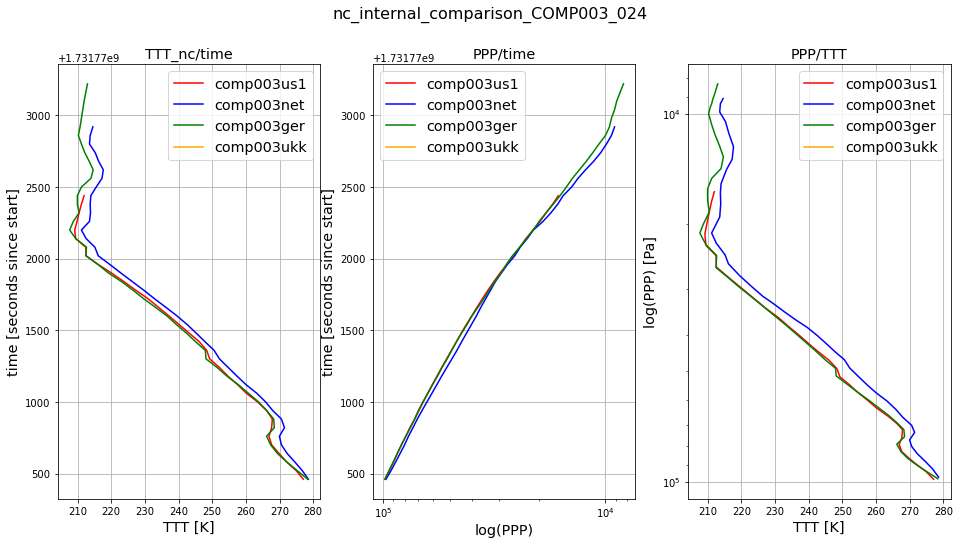

----
5
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc


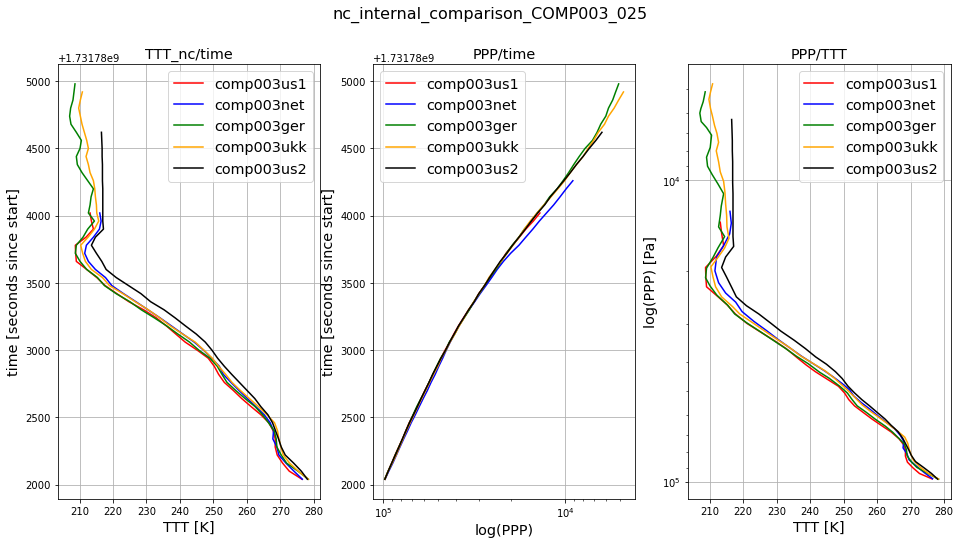

----
5
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc


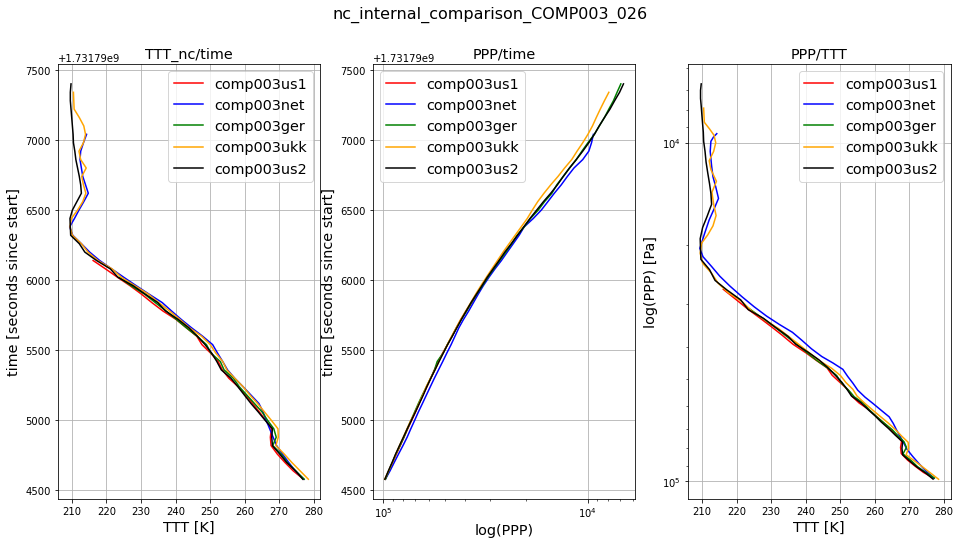

----
5
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc


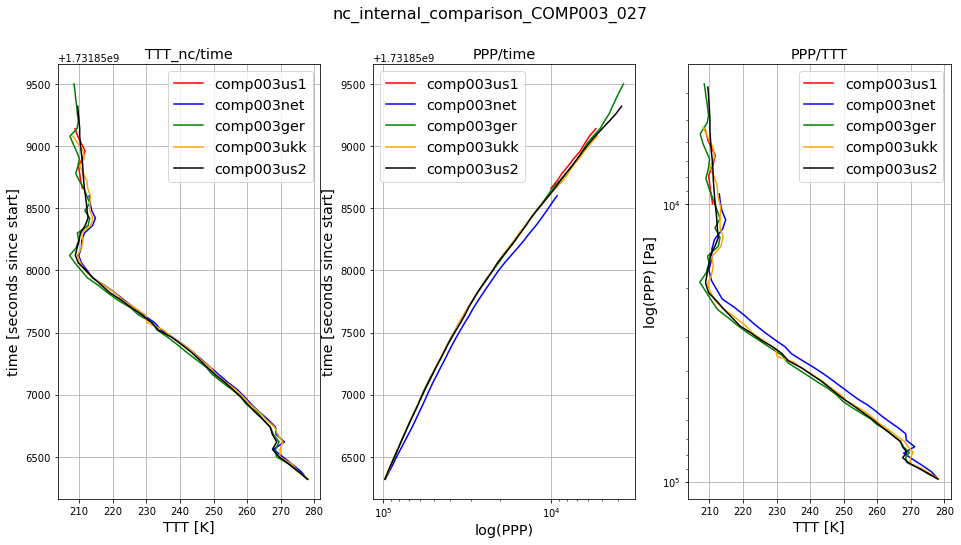

----
5
0-20100-0-00301.nc
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc


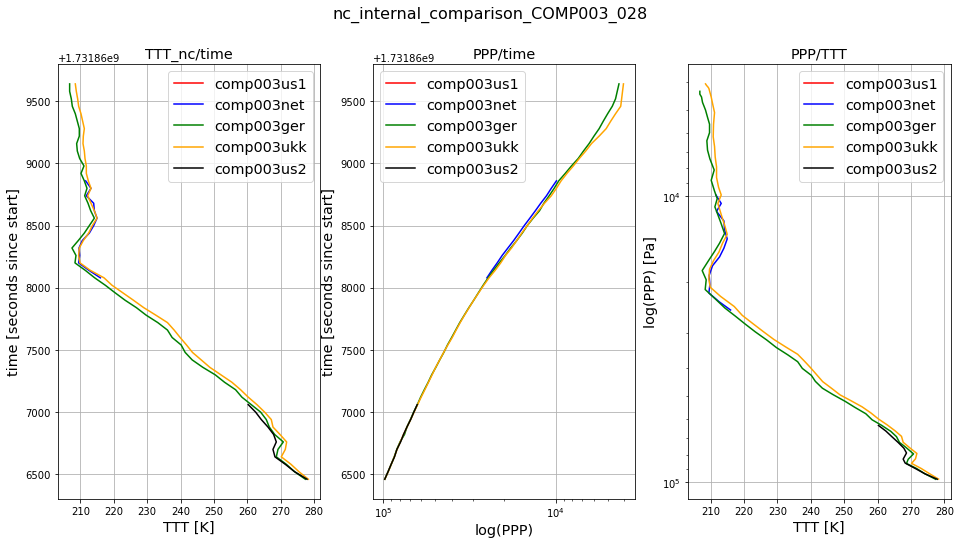

----
4
0-20100-0-00302.nc
0-20100-0-00303.nc
0-20100-0-00304.nc
0-20100-0-00305.nc
only  4
only  4
only  4


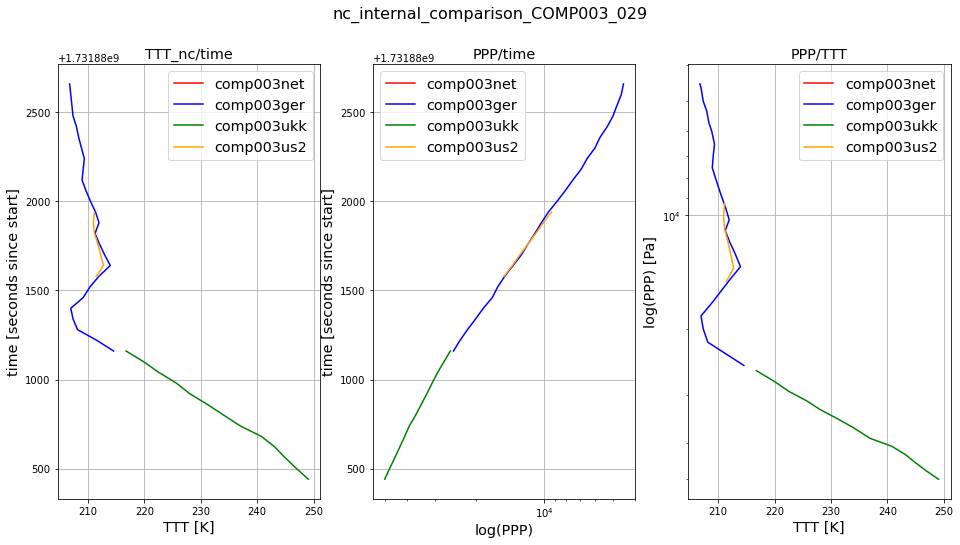

----


In [7]:
comp = 'COMP003'

file = r'/raid60/scratch/leo/scratch/RI/Pangaea/COMP/' +comp+ '/' +comp+ '_ListProfiles.xls'
df = pandas.read_excel(file)

file = r'/raid60/scratch/leo/scratch/RI/Pangaea/nc/mapping.tsv'
tsv_read = pandas.read_csv(file, sep='\t')
tsv_read['Comparison'][0] , tsv_read['File'][0]

# get each timeseries from one ascent
comps = []
for i in df.drop_duplicates(subset=['id_ascent'])['id_ascent']:
    comps.append(df[df['id_ascent'] == i])

# iterate over all ascents (groups of timeseries)
for j in comps:
    sondlist = np.array(j.ri_name)
    print(len(j))
    if(len(j) <= 1):
        print('nothing to compare - one ascent or less')
        continue
#     iterate over each sensor teamseries in the ascent group
    temp = []
    pres = []
    time = []
    for i in range(len(j)):
#         iterate through the tsv
        for k in range(len(tsv_read)):
#         find the right .nc file throug the sensor name
            if(tsv_read['Comparison'][k] == j.iloc[i]['ri_name']):
                ncfilename = tsv_read['File'][k]
                break
#         open data and extract only the wanted ascents       
        print(ncfilename)
        data = eua.CDMDataset('/raid60/scratch/leo/scratch/RI/Pangaea/nc/'+ncfilename)

        # selection: creats a slice to read the data, 
        selection = data.read_observed_variable(85, 
                            plevs = eua.std_plevs*100, 
                            times = None,
                            return_index=True
                           )

        x = data.profile_to_dataframe('observations_table', 
                                      ['observation_value', 'date_time', 'z_coordinate', 'observed_variable', 'report_id'],
                                      np.where(selection[1])[0],
                                      date_is_index=True)
        
        x = x[x.observed_variable == 85]
        ida = ncfilename[:15] + '-' + j.iloc[i]['id_ascent'][-3:]
        try:
            x = x[x['report_id'] == ida]
        except:
            print('missing Data for: ' + ida + ' in ' + ncfilename)

        temp.append(x.observation_value)
        time.append(x.date_time)
        pres.append(x.z_coordinate)
#     plt and save here
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
#     fig.tight_layout()
#     -
    ax1.plot(temp[0], time[0], c='red')
    ax1.plot(temp[1], time[1], c='blue')
    try:
        ax1.plot(temp[2], time[2], c='green')
    except:
        print('only ' , len(j))
    try:
        ax1.plot(temp[3], time[3], c='orange')
    except:
        print('only ' , len(j))
    try:
        ax1.plot(temp[4], time[4], c='black')
    except:
        print('only ' , len(j))
    ax1.set(xlabel ='TTT [K]', ylabel='time [seconds since start]', title='TTT_nc/time')
    ax1.legend(sondlist, loc='best')
    ax1.grid()
#     -
    ax2.semilogx(pres[0], time[0], c='red')
    ax2.semilogx(pres[1], time[1], c='blue')
    try:
        ax2.semilogx(pres[2], time[2], c='green')
    except:
        print('only ' , len(j))
    try:
        ax2.semilogx(pres[3], time[3], c='orange')
    except:
        print('only ' , len(j))
    try:
        ax2.semilogx(pres[4], time[4], c='black')
    except:
        print('only ' , len(j))
    ax2.set(xlabel='log(PPP)', ylabel ='time [seconds since start]', title='PPP/time')
    ax2.invert_xaxis()
    ax2.legend(sondlist, loc='best')
    ax2.grid()
#     -
    ax3.semilogy(temp[0], pres[0], c='red')
    ax3.semilogy(temp[1], pres[1], c='blue')
    try:
        ax3.semilogy(temp[2], pres[2], c='green')
    except:
        print('only ' , len(j))
    try:
        ax3.semilogy(temp[3], pres[3], c='orange')
    except:
        print('only ' , len(j))
    try:
        ax3.semilogy(temp[4], pres[4], c='black')
    except:
        print('only ' , len(j))
    ax3.set(xlabel ='TTT [K]', ylabel='log(PPP) [Pa]', title='PPP/TTT')
    ax3.invert_yaxis()
    ax3.legend(sondlist, loc='best')
    ax3.grid()
#     -
    picname = 'nc_internal_comparison_'+np.array(j.id_ascent)[0]
    fig.suptitle(picname, fontsize=16)
    plt.show()
#     fig.savefig(picname +'.png')
    plt.close(fig)
    print('----')
#     if(ida == '0-20100-0-00202-054'):
#         break

